# Regression Basics

- <font size=3>https://reurl.cc/1xAALp</font>

# 載入常用程式庫及常數定義

In [2]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '\\Google Drive\\adventures\\'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
# import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'regression\\'
data_dir = groot_dir + 'regression\\'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

EX1DATA = '147xBeCECYur0FxDyly-oG2BqsqEH2Mxm'
EX1DATA2 = '101qw-9OkjCxwuSkBJUBaGURRWpZbFKOe'
EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'
ADVER = '1xFMcCuiMgX9VnelDtbyyV9rXBMFerx8k'
TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran regression basics...') 
print('\nLibraries and dependenciess imported')
print_local_now()


Running on win32
Python Version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Data storage points to ==> C:\Users\TyKA\Google Drive\adventures\regression\

This module is amied to leran regression basics...

Libraries and dependenciess imported
Local Time: 2021-07-03 16:37:24.917322


# 練習資料從哪裏來？

- [UCI regression datasets](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
- [sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
    - [sklearn: make_gression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)

## make_regression

- [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression)

* 從 sklearn.datasets 載入 make_regression \
以 make_regression 建立練習數據集

* 以 scatter plot 呈現數據

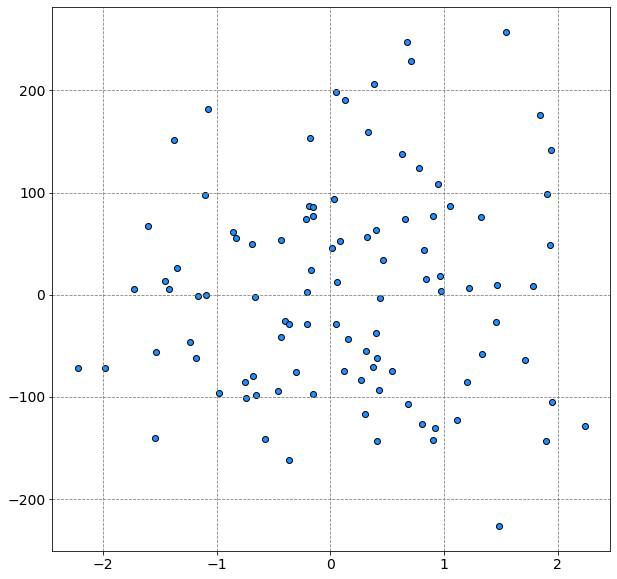

In [3]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

x0, y = make_regression(n_samples=100, n_features=2, bias = 0.1, noise=0.1, random_state=0)
X = np.sort(x0[:, 0]).reshape(-1, 1)

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(X, y, c="dodgerblue", edgecolor = "k")
ax.grid(b = True, which = "major", color = "#808080", ls = "--")

## create dataset on your own

- [numpy rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html?highlight=rand#numpy.random.rand)
- [numpy randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html?highlight=randn#numpy.random.randn)

* 使用 numpy rand & randn 建立數據集 \
X = 2 * np.random.rand(100, 1) \
y = 1.6 + 3 * X + np.random.randn(100, 1)

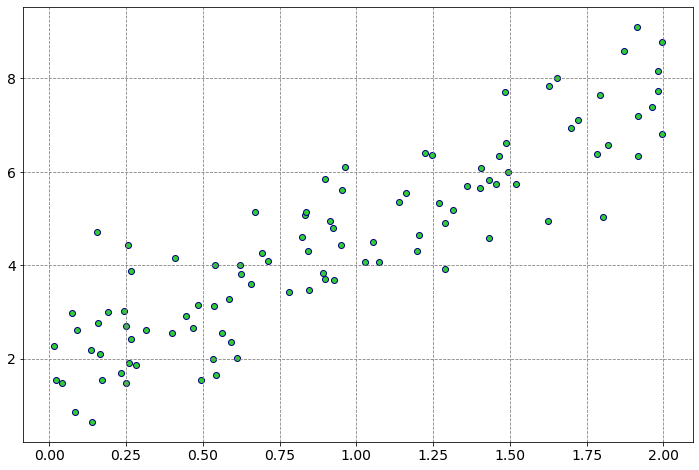

In [4]:
X = 2 * np.random.rand(100, 1)
y = 1.6 + 3 * X + np.random.randn(100, 1)

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X, y, c = "limegreen", edgecolor = "navy")
ax.grid(b = True, ls = "--", c = "#808080")

## sklearn load_data() utilities

- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
- [load_boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

* 從 sklearn.datasets 載入 load_boston (波士頓房價數據集) \
X: data, y: target

In [5]:
from sklearn.datasets import load_boston
X, y = load_boston()["data"], load_boston()['target']
print(X.shape, y.shape)

(506, 13) (506,)


In [6]:
print(load_boston())

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

## Data used in keynote

In [51]:
from scipy.io import loadmat
import statsmodels.api as sm

simple_x = np.array([2,9,5,5,3,7,1,8,6,2],dtype=np.float64)
simple_y = np.array([69,98,82,77,71,84,55,94,84,64],dtype=np.float64)

#
# for polynomial regression
#
poly_x = np.array([2, 9, 5, 5, 3, 7, 1, 8, 6, 2 ], dtype = np.float64)
poly_y = np.array([69, 92, 82, 72, 71, 84, 40, 94, 88, 59], dtype = np.float64)

wiki_x = np.array([1.47, 1.50, 1.52,1.55, 1.57, 
              1.60, 1.63, 1.65, 1.68, 1.70, 
              1.73, 1.75, 1.78, 1.80, 1.83 ], dtype = np.float64)
wiki_y = np.array([52.21, 53.12, 54.48, 55.84, 57.20,
             58.57, 59.93, 61.29, 63.11, 64.47, 
             66.28, 68.1, 69.92, 72.19, 74.46], 
            dtype = np.float64)

# EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'

# fetch_gdrive_file(EX5DATA, os.path.join(data_dir, 'ex5datam1.mat'))
awdata = loadmat( os.path.join(data_dir, 'ex5data1.mat'))

# # Load from ex5data1.mat, where all variables will be store in a dictionary

# # Extract train, test, validation data from dictionary
# # and also convert y's form 2-D matrix (MATLAB format) to a numpy vector
aw_x, aw_y = np.array(awdata['X']), np.array(awdata['y'])
aw_xtest, aw_ytest = np.array(awdata['Xtest']), np.array(awdata['ytest'])
aw_xval, aw_yval = np.array(awdata['Xval']), np.array(awdata['yval'])

## Download UCI files

In [ ]:
sample_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

In [ ]:
import zipfile, gzip, shutil

#
# Input: 
#    zip_file   : the compressed file ended with '.zip' or '.gz'
#    extract_to: the directory you want to put uncompressed file
#
#          Note that extract_to must be ended with '/'
#
def ungzip(zip_file, extract_to):
    gzfile = zip_file.split('/')[-1]
    new_name = os.path.join(extract_to, gzfile.split('.')[0])
    print('new name=', new_name)
    with gzip.open(zip_file, 'rb') as f_in:
        with open(new_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

def unzip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        
def my_downloader(remote_url, extrac_to):
    fetch_file_via_requests(remote_url, extrac_to)
    local_name = remote_url.split('/')[-1]
    file_ext = remote_url.split('.')[-1]
    if (file_ext == 'zip'):
        unzip(os.path.join(extrac_to, local_name), data_dir)
    elif (file_ext == 'gz') or (file_ext == 'gzip'):
        ungzip(os.path.join(extrac_to, local_name), data_dir)
 
my_downloader(sample_url, data_dir)
print(f'data downloaded and stored in {data_dir}')

# 套件 sklearn & statsmodels

## sklearn.linear_model.LinearRegression

* 從 sklearn.linear_model 載入 LinearRegression \
利用簡單線性回歸訓練 房價數據 \
輸出 迴歸係數 及 迴歸截距

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)
print(lr.coef_, lr.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.459488385089855


* 從 sklearn.metrics 載入 r2_score
* 輸出 決定係數 $R^2$

In [8]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X)
r2_rep = r2_score(y, y_pred)
print(r2_rep)

0.7406426641094095


## statsmodels ols

- [add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html)
- [OLS](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)

* 載入 statsmodels 並輸出統計量

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(x, y):
    x_add = sm.add_constant(x)
    model = sm.OLS(y, x_add).fit()
    return model

In [10]:
ols = simple_ols(X, y)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        16:38:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
ols.params, len(ols.params), ols.rsquared, ols.rsquared_adj, ols.pvalues

(array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
        -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
         9.31168327e-03, -5.24758378e-01]),
 14,
 0.7406426641094095,
 0.733789726372463,
 array([3.28343850e-12, 1.08681010e-03, 7.78109688e-04, 7.38288071e-01,
        1.92503033e-03, 4.24564381e-06, 1.97944110e-18, 9.58229309e-01,
        6.01349110e-13, 5.07052902e-06, 1.11163672e-03, 1.30883513e-12,
        5.72859167e-04, 7.77691177e-23]))

## Normal Equation

$\theta = (X^TX)^{-1}(X^Ty)$

X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance

# X_b = np.append(np.ones((len(X), 1)),X,axis=1) # alternative way to do this

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# 如何畫散佈圖（scatter plot）？

* make_regression
* n_samples = 100, n_features = 2,  bias = 0.2, noise = 0.2

In [12]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 100, n_features=2, bias = 0.2, noise = 0.2, random_state=0)
X = X[:, 0]

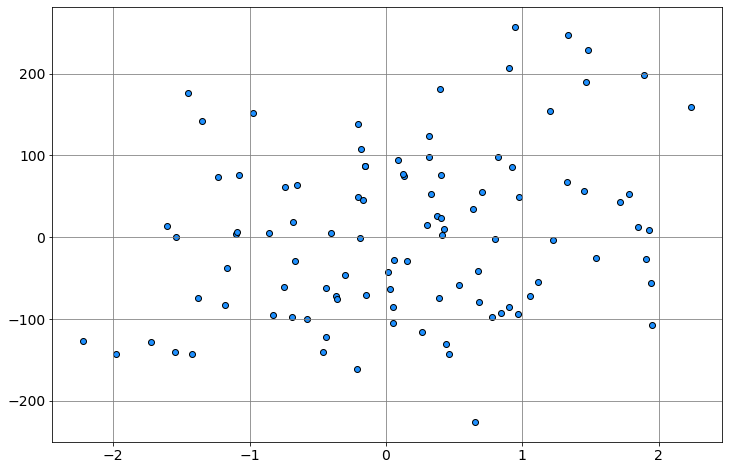

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X, y, color = "dodgerblue", edgecolor = "k")
ax.grid(b = True, which = "major", c = "#808080")

## simple scatter plot

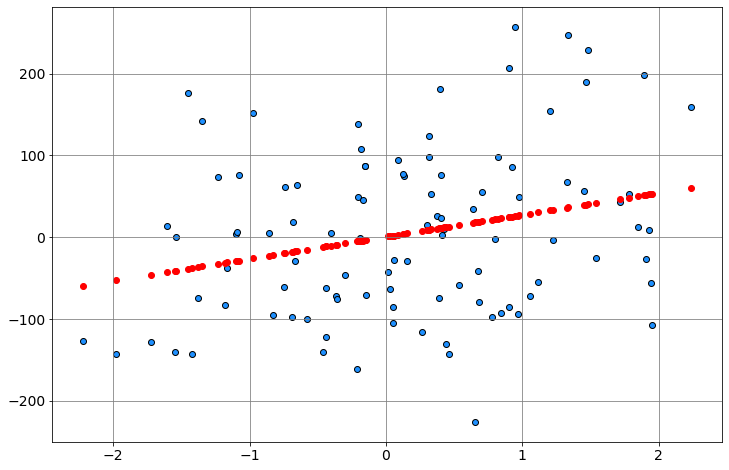

In [15]:
model = simple_ols(X, y)

fig, ax = plt.subplots(figsize =(12, 8) )
ax.scatter(X, y, color = "dodgerblue", edgecolor = "k")
ax.scatter(X, model.fittedvalues, color = "r")
ax.grid(b = True, which = "major", c = "#808080")

## seaborn regplot 

* EX1DATA
https://drive.google.com/uc?id=147xBeCECYur0FxDyly-oG2BqsqEH2Mxm
* EX1DATA2
https://drive.google.com/uc?id=101qw-9OkjCxwuSkBJUBaGURRWpZbFKOe
* EX5DATA
https://drive.google.com/uc?id=1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J

In [16]:
df = pd.read_csv(os.path.join(data_dir, "ex1data1.txt"), header = None)

In [17]:
df.columns = ["x", "y"]
df

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


* 以 seaborn.jointplot 輸出數據分佈

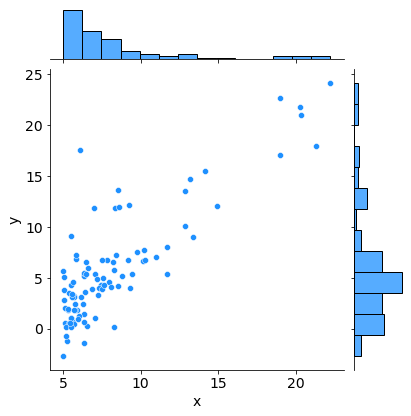

In [18]:
sns.jointplot(x = df["x"], y = df["y"], color = "dodgerblue")

* 輸出 最小平方法回歸結果

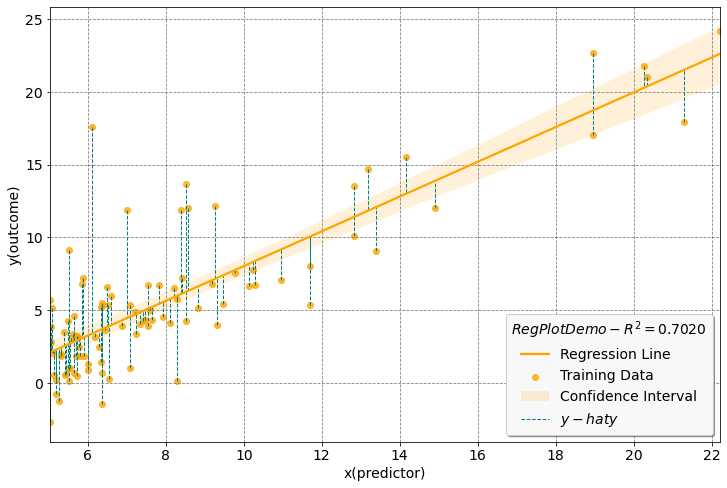

In [19]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.regplot(x = df["x"], y = df["y"], color = "orange")

ols = simple_ols(df["x"], df["y"])
ax.vlines(x = df["x"], ymin = df["y"], ymax = ols.fittedvalues, color = "teal", ls = "--", lw = 1)
ax.set_xlabel("x(predictor)")
ax.set_ylabel("y(outcome)")
ax.grid(b = True, which= "major", ls = "--", c = "#808080")
ax.legend(["Regression Line", "Training Data", "Confidence Interval", r"$y - hat y$"],
          loc = "best", frameon = True, shadow = True, title = r"$RegPlot Demo - R^2 = %.4f$" %ols.rsquared, facecolor = "#f8f8f8")

# Multivariate Regression

## CS229 Ex1-2

fetch_file_via_requests(
    DropboxLink('90gzmvbih77fhnk', 'ex1data2.txt'), data_dir
)

In [20]:
data = os.path.join(data_dir, "ex1data2.txt")
df = pd.read_csv(data, sep=",", header=None)
df.tail()

,0,1,2
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [21]:
df.rename(columns={0: "X1", 1: "X2", 2: "y"}, inplace=True)
df.tail()

,X1,X2,y
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


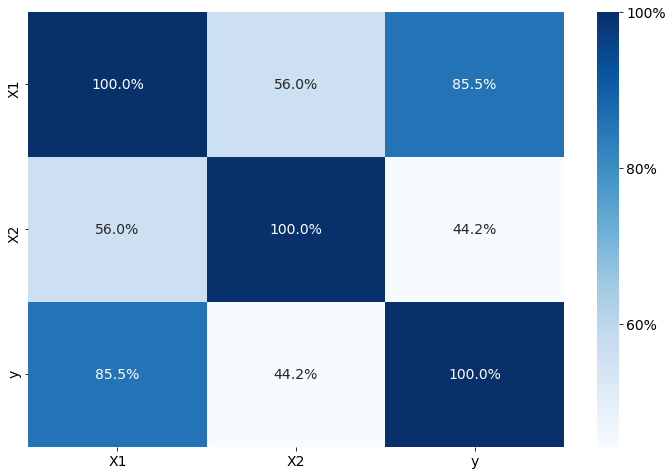

In [22]:
fig, ax = plt.subplots(figsize = (12, 8))
corr = df.corr()
ax = sns.heatmap(data = corr, xticklabels=df.columns, yticklabels=df.columns, annot=True, cmap = "Blues", fmt=".1%")
cbar = ax.collections[0].colorbar
cbar.set_ticks([x for x in np.arange(0, 1.2, 0.2)])
cbar.set_ticklabels([f"{x}%" for x in np.arange(0, 120, 20)])

## load_boston()

* 載入 load_boston 作為練習數據集

In [23]:
from sklearn.datasets import load_boston

data = load_boston()
X, y = data["data"], data["target"]
X.shape, y.shape

((506, 13), (506,))

* 將數據匯入 DataFrame 中，以 simple_ols 運算，並輸出 summary 結果

In [24]:
df = pd.DataFrame(data = X, columns=data["feature_names"])

model = simple_ols(df, y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        16:44:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 將原數據標準化後，送入 simple_ols 計算，觀察結果

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
df = pd.DataFrame(data=X, columns = data["feature_names"])
model = simple_ols(df, y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        16:46:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
RM             2.6742      0.293      9.116      0.000       2.098       3.251
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
B              0.8493      0.245      3.467      0.001       0.368       1.331
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ISLR adver.csv

fetch_file_via_requests(
    DropboxLink('uev3kektwswh21c', 'adver.csv'), data_dir )

* 載入數據 adver.csv

In [26]:
adata = os.path.join(data_dir, "adver.csv")
adf = pd.read_csv(adata, index_col=0)
adf.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


* 輸出 Heatmap

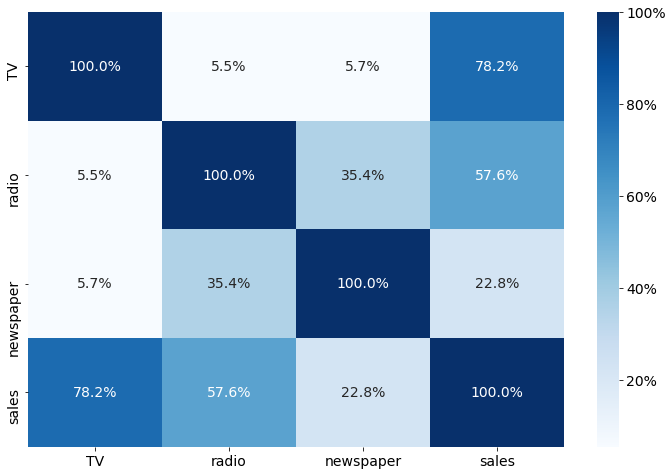

In [28]:
fig, ax = plt.subplots(figsize = (12, 8))
corr = adf.corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap = "Blues", fmt = ".1%")
cbar = ax.collections[0].colorbar
cbar.set_ticks([x for x in np.arange(0, 1.2, 0.2)])
cbar.set_ticklabels([f"{x}%" for x in np.arange(0, 120, 20)])

* 輸出 seaborn.pairplot

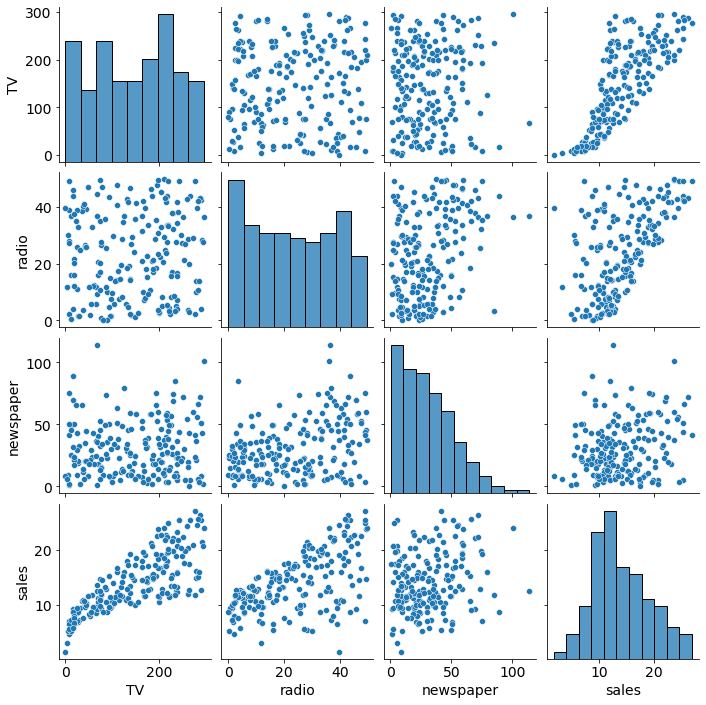

In [29]:
sns.pairplot(adf)

* 嘗試使用seaborn.FacetGrid 繪製多重 regplot

Text(0.5, 29.120000000000033, 'Money spent on medias')

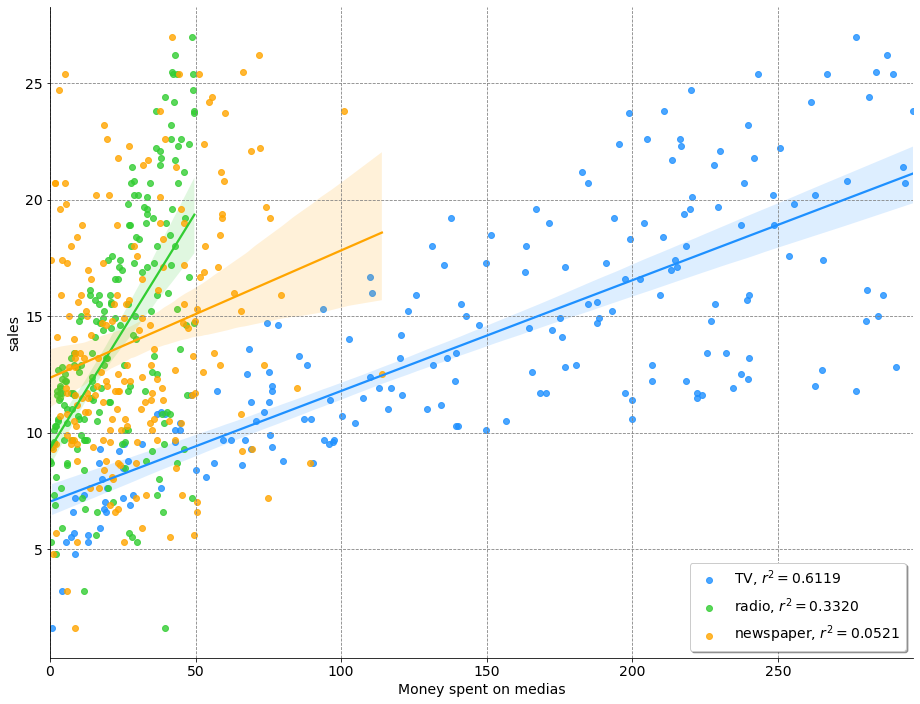

In [40]:
from sklearn.metrics import r2_score

media = adf.columns[:-1].values
mcolors = ["dodgerblue", "limegreen", "orange"]
g = sns.FacetGrid(adf, height=10, aspect=1.3)

for m, c in zip(media, mcolors):
    ols = simple_ols(adf[m], adf["sales"])
    r2 = ols.rsquared
    g.map(sns.regplot, m, "sales", data = adf, color = c, label = m + ", "+ r"$r^2 = %.4f$" %r2)
plt.grid(b = True, which = "major", ls = "--", color = "#808080")
plt.legend(loc = "best", shadow = True, fontsize = 14)
plt.xlabel("Money spent on medias")

In [41]:
simple_ols(adf.drop(["sales"], axis = 1), adf["sales"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        17:17:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 使用 pandas.DataFrame.filter 從 adf 提取 ["TV", "radio"] 並多一欄兩者乘積

In [43]:
ndf = adf.filter(["TV", "radio"], axis = 1)
ndf["new"] =  ndf["TV"] * ndf["radio"]
ndf.head()

,TV,radio,new
1,230.1,37.8,8697.78
2,44.5,39.3,1748.85
3,17.2,45.9,789.48
4,151.5,41.3,6256.95
5,180.8,10.8,1952.64


In [44]:
simple_ols(ndf, adf["sales"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          6.68e-146
Time:                        17:21:35   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
new            0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

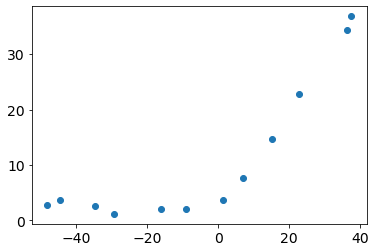

In [52]:
X, y  = aw_x, aw_y
plt.scatter(X, y)

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

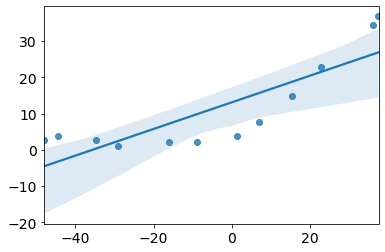

In [16]:
sns.regplot(X, y)

## Numpy.polyfit

* 建立 Numpy 多重回歸副程式

In [46]:
def plotfit_wrapper(x, y, deg = 3):
    y_pred = np.polyfit(x.flatten(), y.flatten(), deg)
    return np.polyval(y_pred, x.flatten()), y_pred

## sklearn Polynomail Features()

* 建立 PolynominalRegression 副程式

In [47]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def PolynominalRegression(X, y, deg = 3, x_domain = None):
    model = make_pipeline(
        PolynomialFeatures(degree=deg, include_bias=False),
        LinearRegression()).fit(X, y)
    if x_domain is None:
        x_domain = np.linspace(min(X.flatten()), max(X.flatten()), 100)
    fittedvalues = model.predict(x_domain)
    return model, fittedvalues, r2_score(y, model.predict(X))

* 與簡單線性回歸進行比較

In [54]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X)
lin = LinearRegression()
lin.fit(X_train_poly, y)

x_domain = np.linspace(min(X), max(X), 100)
model, y_pred, r2 = PolynominalRegression(X, y, 5, x_domain)

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


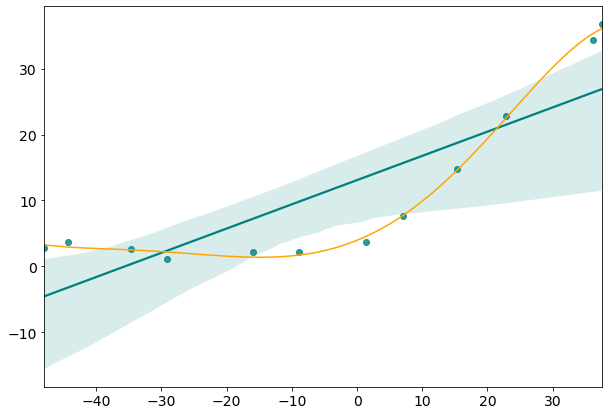

In [55]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.regplot(X, y, color = "teal", ax = ax)
ax.plot(x_domain, y_pred, color = "orange")


## Taiwan.CSV

In [11]:
tw_csv = 'https://dl.dropboxusercontent.com/s/upr5klwy07bba3h/taiwan.csv'
fetch_file_via_requests(tw_csv, data_dir)

'C:\\Users\\TyKA\\Google Drive\\adventures\\regression\\taiwan.csv'

* 載入 Taiwan.csv 於 DataFrame 中

In [58]:
tdf = pd.read_csv(os.path.join(data_dir, "taiwan.csv"), parse_dates=["date"], index_col=["date"])
tdf.tail()

,Taiwan,Local,Imported,Deaths,Recovered,Panshi
date,,,,,,
2020-07-27,462,55,371,7,440,36
2020-07-28,467,55,376,7,440,36
2020-07-29,467,55,376,7,440,36
2020-07-30,467,55,376,7,440,36
2020-07-31,467,55,376,7,440,36


In [59]:
tdf2 = pd.DataFrame()
tdf2["Active"] = tdf["Taiwan"] - tdf["Deaths"] - tdf["Recovered"]
tdf2

,Active
date,
2020-01-22,1
2020-01-23,1
2020-01-24,3
2020-01-25,3
2020-01-26,4
...,...
2020-07-27,15
2020-07-28,20
2020-07-29,20


* 以 tdf2 是做多項式回歸

In [61]:
x_domain = np.arange(0, len(tdf2), 1).reshape(-1, 1)
X, y = x_domain, tdf2["Active"]

for i in np.arange(2, 7):
    _, y_pred, r2 = PolynominalRegression(X, y, deg=i, x_domain=x_domain)
    tdf2[f"order={i:d}, r2={r2:.4f}"] = y_pred

In [62]:
tdf2.tail()

,Active,"order=2, r2=0.3730","order=3, r2=0.5030","order=4, r2=0.6436","order=5, r2=0.7643","order=6, r2=0.7908"
date,,,,,,
2020-07-27,15,-65.292100,-1.176701,58.396634,15.597888,3.418163
2020-07-28,20,-69.156216,-0.145179,68.230892,13.368212,-6.249714
2020-07-29,20,-73.058802,0.984663,78.623760,10.663730,-17.366164
2020-07-30,20,-76.999859,2.214304,89.588542,7.451153,-30.032274
2020-07-31,20,-80.979387,3.545223,101.138669,3.696177,-44.352963


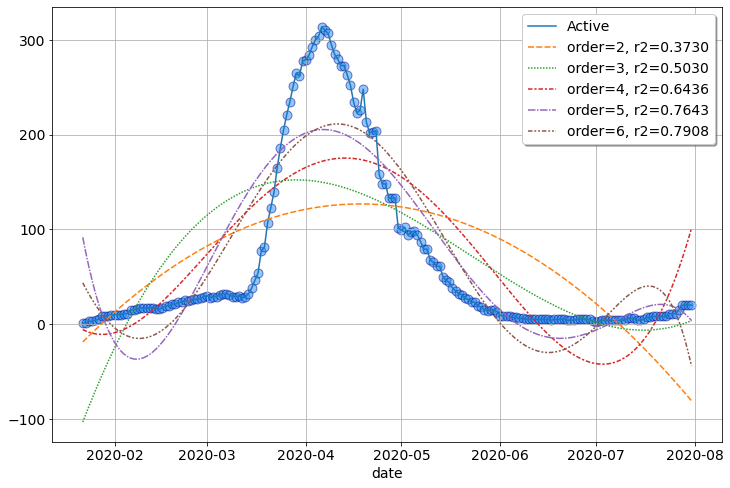

In [70]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.lineplot(data=tdf2)
ax.scatter(x = tdf2.index, y = tdf2["Active"], s = 80, c = "dodgerblue", edgecolor = "navy", marker = "o", alpha = 0.5)
ax.legend(loc = 0, frameon = True, shadow = True)
ax.grid()

# 如何繪製學習曲線

- [sklearn plot_learning_curves demo](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)
- [sklearn learning_curve API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)
- [Learning curve](https://www.ritchieng.com/machinelearning-learning-curve/)

- [Evaluating Learing Algorithm](https://www.ritchieng.com/applying-machine-learning/)
- [Evaluating model performance: Generalization, Bias- Variance tradeoff and overfitting vs. underfitting |Part 2](https://www.intermediait.com/blog/2020/01/12/evaluating-model-performance-generalization-bias-variance-tradeoff-and-overfitting-vs-underfitting-part-2/)
- [YellowBrick LearningCurve](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html)

* 輸出以下 func \
$ y = 0.5 \times x^2 + x + 2 + randn(100,1)$

In [74]:
X = 6*np.random.rand(100, 1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(100, 1)

* 確認 func 輸出結果

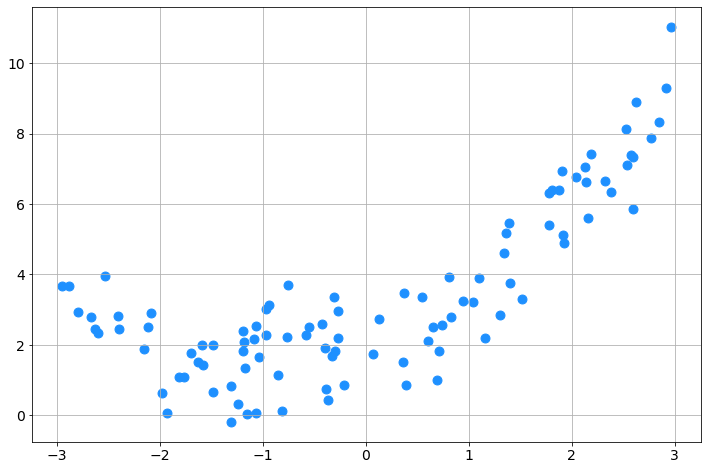

In [75]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X, y, c = "dodgerblue", s=  80)
ax.grid()

* 輸出 seaborn.regplot 簡單線性迴歸結果

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


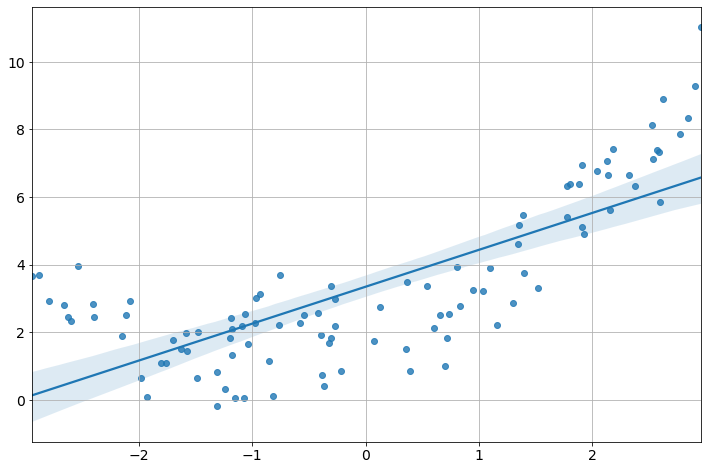

In [77]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.regplot(X, y)
ax.grid()

* 輸出 r_squared 結果

In [78]:
simple_ols(X, y).rsquared

0.5769267720755434

## ## 簡化版 sklearn plot_learning_curves()

- [click here for original version](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [84]:
from sklearn.model_selection import learning_curve

def my_plot_learning_curves(model, X, y, cv = None, scoring = None, n_jobs = None, train_sizes = np.linspace(0.1, 1, 5)):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    
    train_sizes_abs, train_scores, test_scores, fit_times, _ = \
    learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis = 1)
    fit_times_std = np.std(fit_times, axis = 1)
    
    # plot learning curve
    ax.grid()
    ax.fill_between(train_sizes_abs, y1=train_scores_mean - train_scores_std, y2 = train_scores_mean+train_scores_std, 
                    alpha = 0.1, color = "dodgerblue")
    ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean+test_scores_std,
                    alpha=0.1, color = "orange")
    ax.plot(train_sizes_abs, train_scores_mean, marker = "o", c = 'navy', label = r"Training Score")
    ax.plot(train_sizes_abs, test_scores_mean, marker = "o", c = "tomato", label = r"Cross-Validation Scores")
    ax.legend()

## How to use

* 嘗試以 my_plot_learning_curves 輸出簡單線性回歸學習曲線

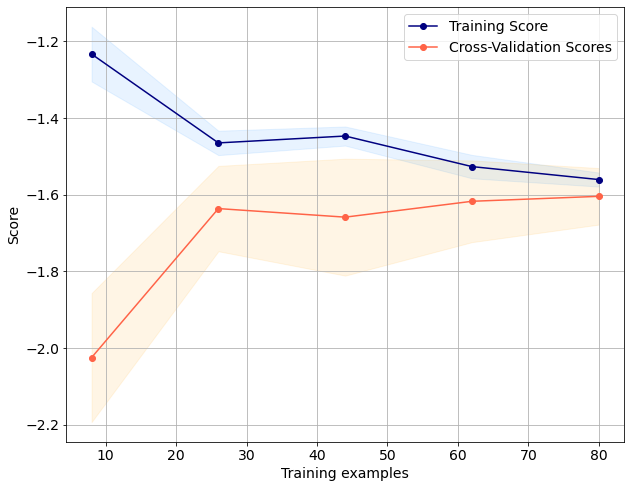

In [85]:
my_plot_learning_curves(LinearRegression(), X, y, scoring="neg_root_mean_squared_error")

* 以 my_plot_learning_rate 輸出 多項式回歸學習曲線

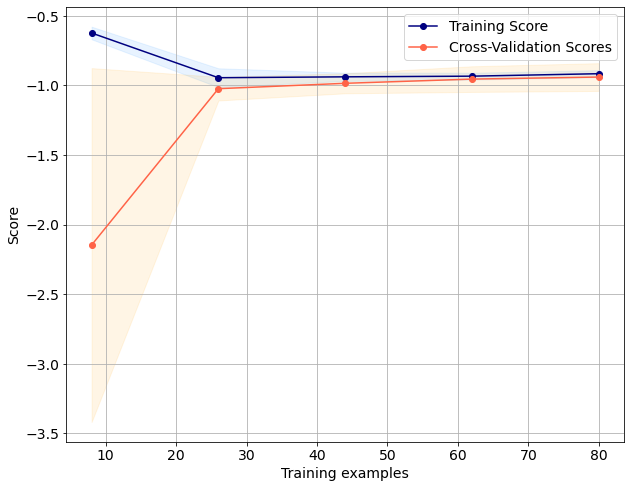

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression()
)

my_plot_learning_curves(model, X, y, scoring = "neg_root_mean_squared_error")

* sklearn.metrics.SCORES.key() 包含所有統計量結果

In [88]:
for x in sklearn.metrics.SCORERS.keys():
    print(x)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


## DIY considerations

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def learning_curve_data(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
    return train_errors, test_errors

def reg_lr_cureve(model, X, y):
    train, val = learning_curve_data(model, X, y)
    
    fig, ax = plt.subplots(figsize = (12, 8))
    ax = sns.lineplot(range(len(train)), -np.sqrt(train), color = "dodgerblue")
    ax = sns.lineplot(range(len(val)), -np.sqrt(val), color = "tomato")
    ax.legend(["Train Error", "Validation Error"], shadow = True, frameon = True)
    ax.set_ylabel("-RMSE")
    ax.set_xlabel("Training Size")

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


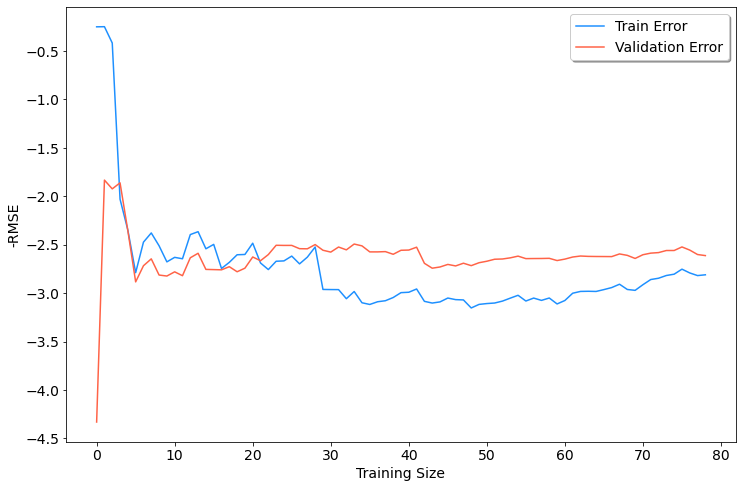

In [90]:
reg_lr_cureve(LinearRegression(), X, y)

# Regularized Models

* 生成以下 func \
$y = 1 + x*0.5 \times \frac{randn(20,1)}{1.5}$

In [91]:
X = 3 * np.random.rand(20, 1)
y = 1+0.5*X + np.random.randn(20, 1) / 1.5

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


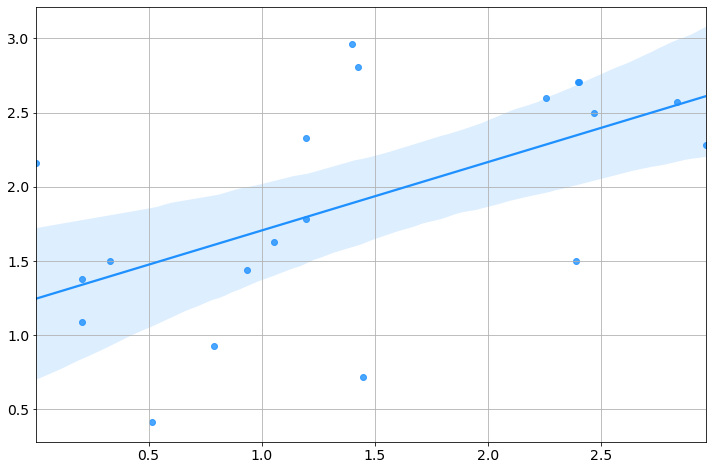

In [93]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.regplot(X, y, color = "dodgerblue")
ax.grid()

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin = LinearRegression().fit(X, y)
y_pred = lin.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2, mse 

(0.3251003586410346, 0.3726203077744473)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Parallel, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

## Ridge

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


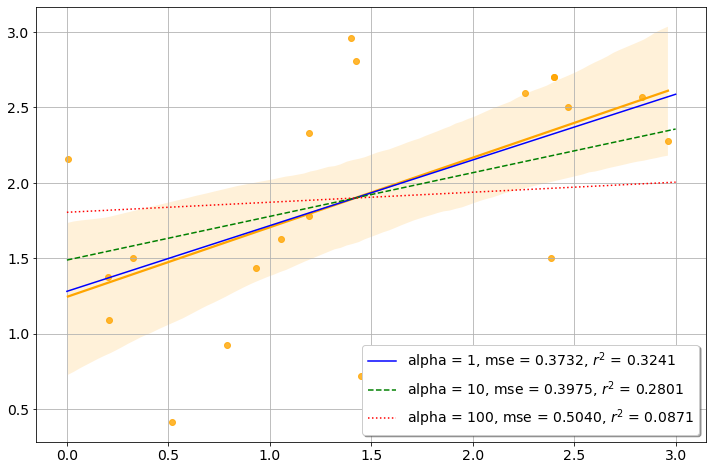

In [103]:
from sklearn.linear_model import Ridge
x_new = np.linspace(0, 3, 100).reshape(100, 1)

alphas = [1, 10, 100]
styles = ["b-", "g--", "r:"]

fig, ax = plt.subplots(figsize =(12, 8))
ax.grid()
ax = sns.regplot(X, y, color = "orange")

for alpha, style in zip(alphas, styles):
    model = Ridge(alpha).fit(X, y)
    y_line = model.predict(x_new)
    yr2 = model.predict(X)
    r2 = r2_score(y, yr2)
    mse = mean_squared_error(y, yr2)
    ax.plot(x_new, y_line, style, label = f"alpha = {alpha:d}, mse = {mse:.4f}, $r^2$ = {r2:.4f}")
    ax.legend(fancybox = True, shadow = True, frameon = True)

* 嘗試輸出多項式Ridge回歸結果

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


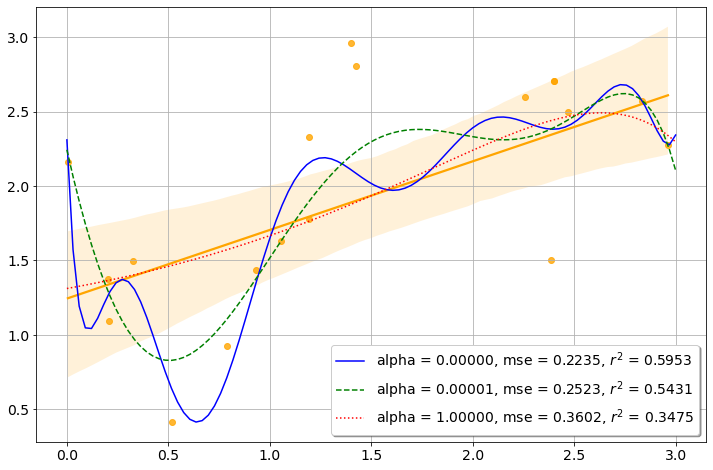

In [110]:
from sklearn.linear_model import Ridge
x_new = np.linspace(0, 3, 100).reshape(100, 1)

alphas = [0, 10**-5, 1]
styles = ["b-", "g--", "r:"]

fig, ax = plt.subplots(figsize =(12, 8))
ax.grid()
ax = sns.regplot(X, y, color = "orange")

for alpha, style in zip(alphas, styles):
    model = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        Ridge(alpha=alpha)
    )
    model.fit(X, y)
    y_line = model.predict(x_new)
    yr2 = model.predict(X)
    r2 = r2_score(y, yr2)
    mse = mean_squared_error(y, yr2)
    ax.plot(x_new, y_line, style, label = f"alpha = {alpha:.5f}, mse = {mse:.4f}, $r^2$ = {r2:.4f}")
    ax.legend(fancybox = True, shadow = True, frameon = True)

## Lasso

* 以多項式搭配 Lasso 回歸

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TyKA\anaconda3\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\TyKA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\TyKA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

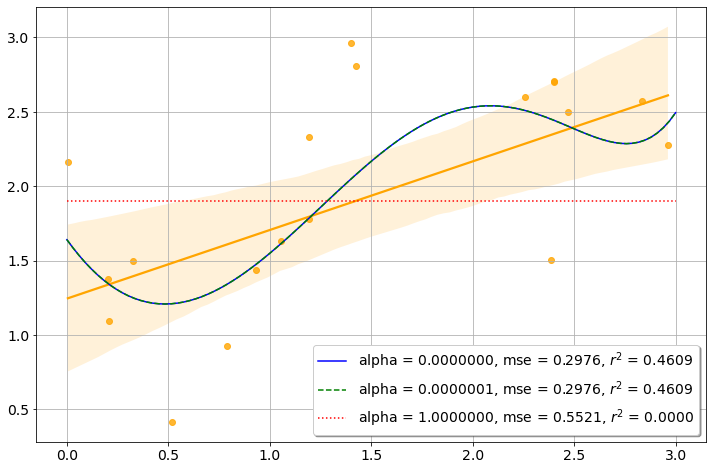

In [113]:
from sklearn.linear_model import Lasso
x_new = np.linspace(0, 3, 100).reshape(100, 1)

alphas = [0, 10**-7, 1]
styles = ["b-", "g--", "r:"]

fig, ax = plt.subplots(figsize =(12, 8))
ax.grid()
ax = sns.regplot(X, y, color = "orange")

for alpha, style in zip(alphas, styles):
    model = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        Lasso(alpha=alpha)
    )
    model.fit(X, y)
    y_line = model.predict(x_new)
    yr2 = model.predict(X)
    r2 = r2_score(y, yr2)
    mse = mean_squared_error(y, yr2)
    ax.plot(x_new, y_line, style, label = f"alpha = {alpha:.7f}, mse = {mse:.4f}, $r^2$ = {r2:.4f}")
    ax.legend(fancybox = True, shadow = True, frameon = True)